![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [121]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.api import qqplot

#import csv files
men=pd.read_csv("men_results.csv")
women=pd.read_csv("women_results.csv")
men['Gender']='Men'
women['Gender']='Women'


print(men.columns)
print(women.columns)

#Both dfs have the same columns so they will be merged for efficiency


Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'Gender'],
      dtype='object')
Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'Gender'],
      dtype='object')


In [122]:
#Merging men with women
df=pd.concat([men, women], axis=0)

#First of all lets see what is the date span and if data is soley sourced from FIFA World Cup
print(df.info())
#converting date to datetime
df['date']=pd.to_datetime(df['date'])
#Creating categories out of gender to save memory
df['Gender']=df['Gender'].astype('category')
print(df.info())

#Checking on consistency for tournament 
print(df['tournament'].value_counts())
#Looks consistent for <<FIFA World Cup>>
#Filtering Data
df=df[df['date']>="2001-01-01"]
df=df[df['tournament']=='FIFA World Cup']

#merging home score and away score into one
df['total_goals']=df['home_score']+df['away_score']
print(df.head)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49237 entries, 0 to 4883
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49237 non-null  int64 
 1   date        49237 non-null  object
 2   home_team   49237 non-null  object
 3   away_team   49237 non-null  object
 4   home_score  49237 non-null  int64 
 5   away_score  49237 non-null  int64 
 6   tournament  49237 non-null  object
 7   Gender      49237 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49237 entries, 0 to 4883
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  49237 non-null  int64         
 1   date        49237 non-null  datetime64[ns]
 2   home_team   49237 non-null  object        
 3   away_team   49237 non-null  object        
 4   home_score  49237 non-null  int64     

8.894154401688226e-13
3.8905201759850683e-13


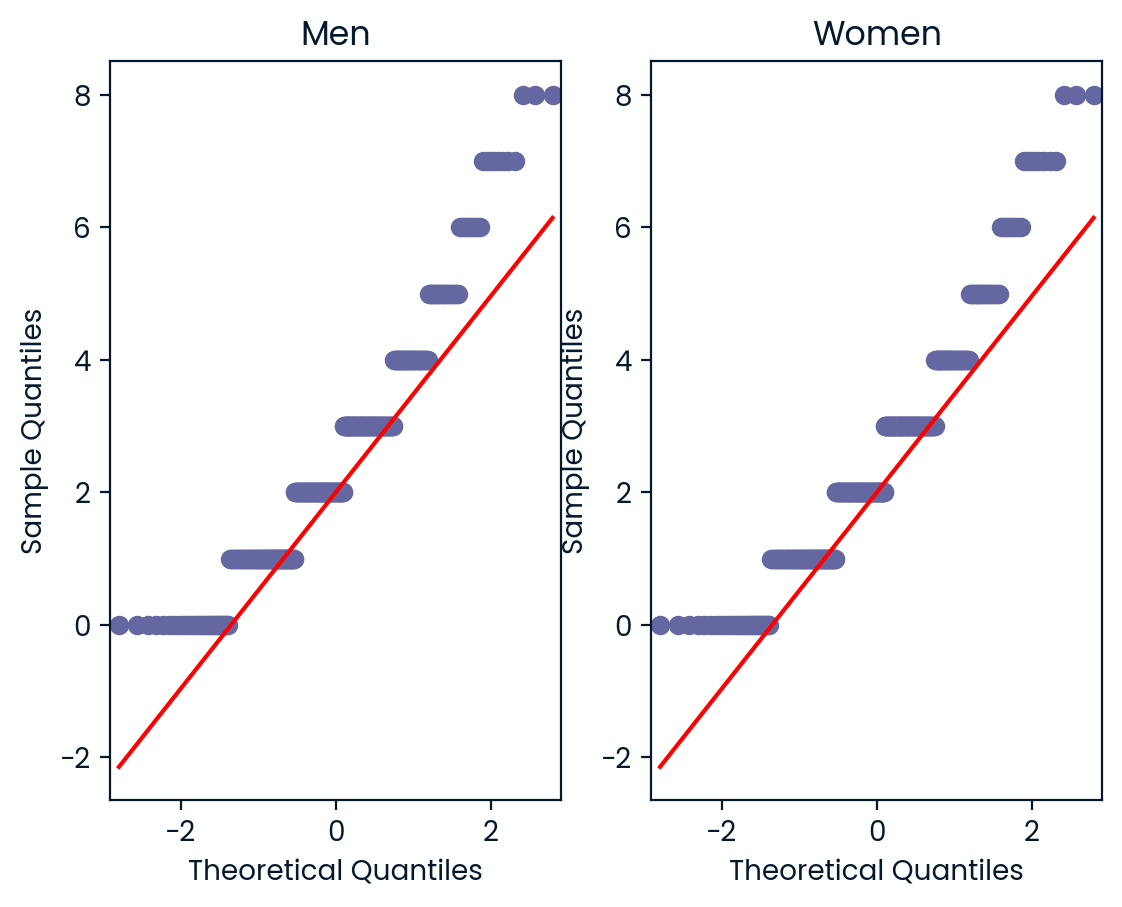

In [123]:
#checking the asumptions of parametric test (normality and sample size above 30)
from scipy.stats import shapiro
_, p_value_men=shapiro(df[df['Gender']=="Men"]['total_goals'])
print(p_value_men)
_, p_value_women=shapiro(df[df['Gender']=='Women']['total_goals'])
print(p_value_women)
fig, ax=plt.subplots(1, 2)
qqplot(df[df['Gender']=='Men']['total_goals'], dist=stats.norm, line='q', ax=ax[0])
ax[0].set_title("Men")
qqplot(df[df['Gender']=='Men']['total_goals'], dist=stats.norm, line='q', ax=ax[1])
ax[1].set_title("Women")
plt.show()


According to the Shapiro_Wilk test performed on both Men and Women the P-value is lower lower than 0,05 so we can say that both distributions are significantly not following a normal distribution, thus parametric test cannot be applied, so a non parametric test will be applied.
The non-parametric tests from Wilcoxon-Mann-Whitney are ideal for this experiment.



In [124]:
#performing a wilcoxon-mann-Whitney nonparametric test
import pingouin

wmw=df[['total_goals','Gender']]
#converting to wide format
wmw_wide=wmw.pivot(columns='Gender', values='total_goals')
print(wmw_wide)
wmw_result=pingouin.mwu(wmw_wide['Women'], wmw_wide['Men'], alternative='greater')
p_val=wmw_result.iloc[0,2]
#for a significance level of 10% we can reject the Null hypothesis
result="reject"
result_dict = {"p_val": p_val, "result": result}
print(p_val)

Gender  Men  Women
1600    NaN    3.0
1601    NaN    2.0
1602    NaN    5.0
1603    NaN    6.0
1604    NaN    4.0
...     ...    ...
44343   3.0    NaN
44345   3.0    NaN
44346   2.0    NaN
44350   3.0    NaN
44352   6.0    NaN

[584 rows x 2 columns]
0.005106609825443641
